In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv('../dataset/dados_pregao_tots3.csv')
data['data_pregao'] = pd.to_datetime(data['data_pregao'])
data = data.rename(columns={'data_pregao': 'ds', 'preco_ultimo_negocio': 'y'})
data = data[['ds', 'y']]
data.head()

,ds,y
0,2018-01-02,30.15
1,2018-01-03,30.79
2,2018-01-04,30.60
3,2018-01-05,31.26
4,2018-01-08,31.24


In [3]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

model = Prophet()
model.fit(train_data)

future = model.make_future_dataframe(periods=len(test_data), freq='B')
forecast = model.predict(future)

12:55:47 - cmdstanpy - INFO - Chain [1] start processing
12:55:47 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

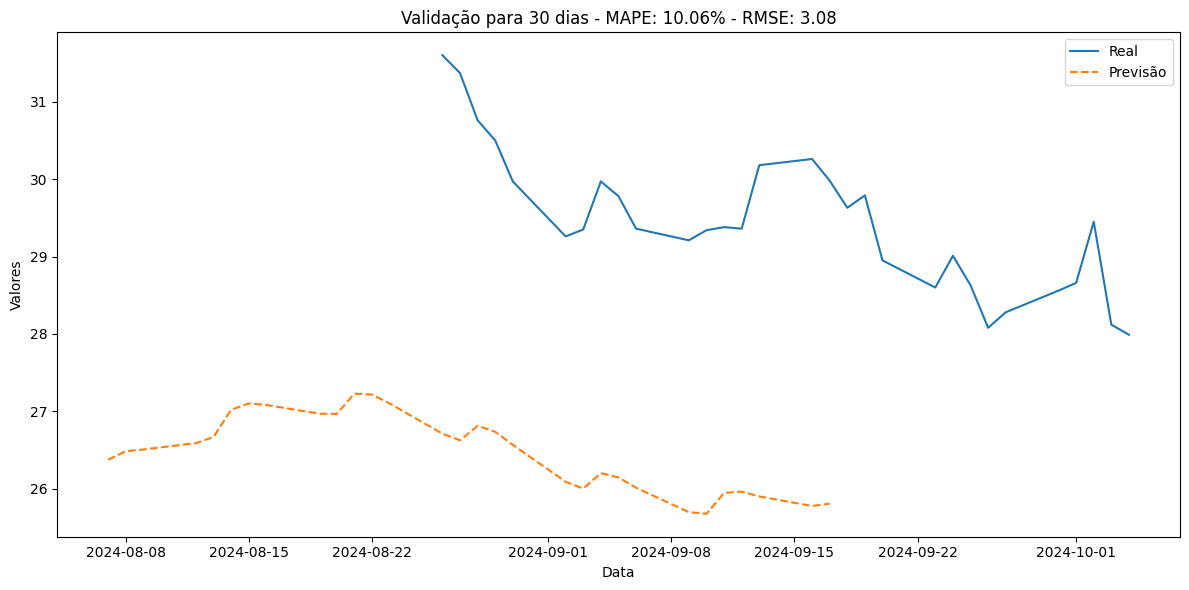

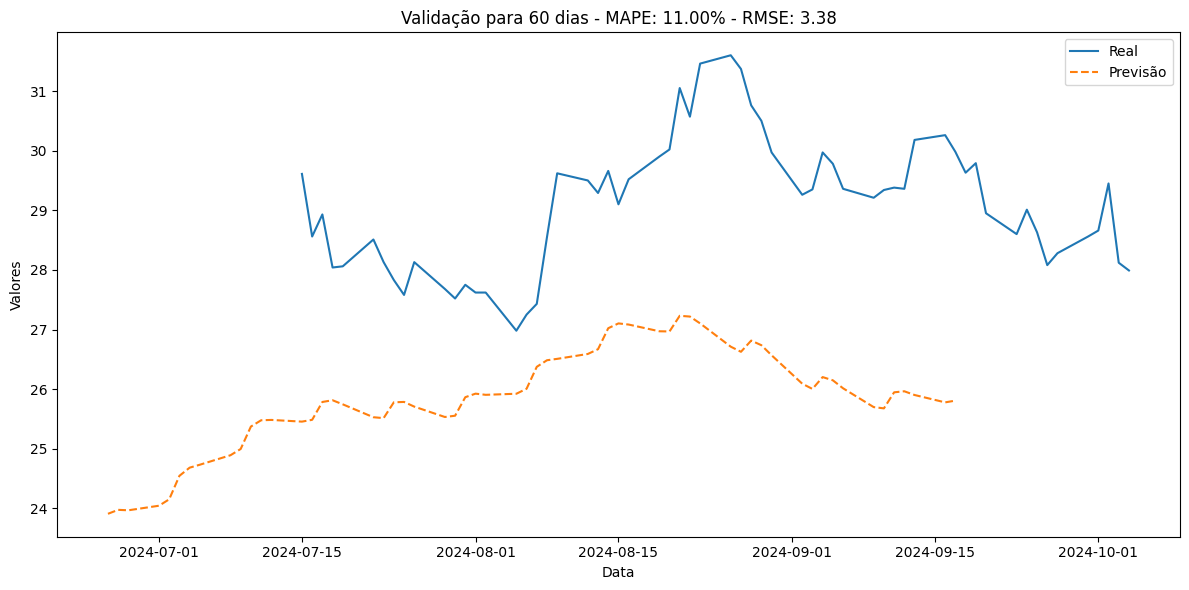

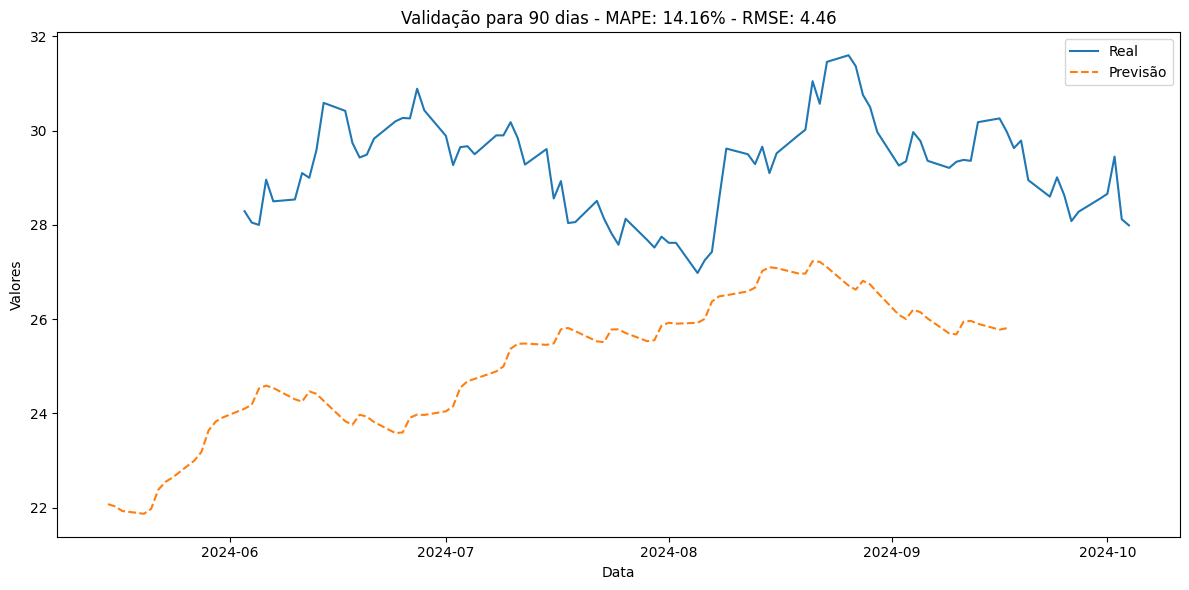

In [4]:
validation_periods = [30, 60, 90]
plt.figure(figsize=(18, 6))

for period in validation_periods:
    plt.figure(figsize=(12, 6))
    
    start_date = test_data['ds'].iloc[0]
    test_period = test_data[test_data['ds'] >= start_date]
    test_period = test_period[-period:]
    
    forecast_period = forecast[-(len(test_data) - (len(test_data) - period)):]
    
    plt.plot(test_period['ds'], test_period['y'], label='Real')
    plt.plot(forecast_period['ds'], forecast_period['yhat'][-period:], label='Previsão', linestyle='--')
    
    mape = mean_absolute_percentage_error(test_period['y'], forecast_period['yhat'][-period:]) * 100
    rmse = np.sqrt(mean_squared_error(test_period['y'], forecast_period['yhat'][-period:]))
    
    plt.title(f'Validação para {period} dias - MAPE: {mape:.2f}% - RMSE: {rmse:.2f}')
    plt.xlabel('Data')
    plt.ylabel('Valores')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

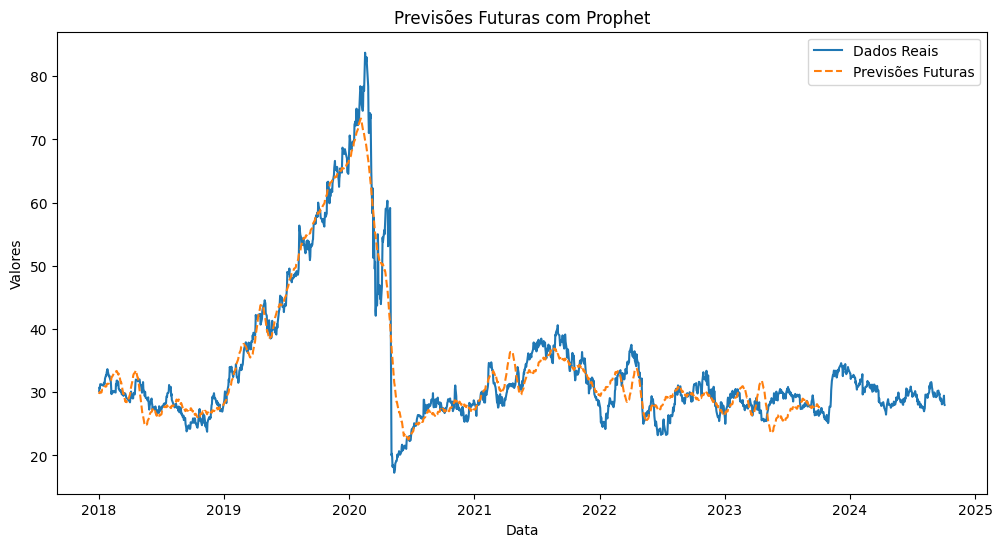

In [5]:
future_forecast = model.make_future_dataframe(periods=90, freq='B')
future_forecast = model.predict(future_forecast)

plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Dados Reais')
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Previsões Futuras', linestyle='--')
plt.title('Previsões Futuras com Prophet')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()